### XGBoost Model por Failure Machine Detection
This script will load a set of tabular data with a target feature to perform supervices training of a electricak generator and predict a failure.

-Jonathan Espín Martin 00339306
- Master Degree

In [ ]:
#available cpus
import multiprocessing
num_cores = multiprocessing.cpu_count()
print(f"Number of available CPU cores: {num_cores}")

Number of available CPU cores: 40


Get the dataframe (tabular)

In [ ]:
#data frame definition based on files
import pandas as pd
import os
exportPath = r"/home/jespinm/power_gen_data/Export10Sec"
files_data = os.listdir(exportPath)
powerdata_dfs = []
for fd in sorted(files_data):
  if fd.endswith(".csv"):
    if fd.endswith("_01.csv"):
      print(fd)
    powerdata_dfs.append(pd.read_csv(f'{exportPath}/%s' % fd,engine='pyarrow', quotechar='"',doublequote=True))
power_df = pd.concat(powerdata_dfs, ignore_index = True)
power_df.t_stamp = pd.to_datetime(power_df.t_stamp)
power_df = power_df.sort_values(by='t_stamp', ascending=True)
power_df.set_index("t_stamp", inplace = True)

#fill nans and clip to 0 (little eda)
power_df = power_df.fillna(0)
power_df = power_df.clip(lower=0)
power_df

2019_05_01.csv
2019_06_01.csv
2019_07_01.csv
2019_08_01.csv
2019_09_01.csv
2019_10_01.csv
2019_11_01.csv
2019_12_01.csv
2020_01_01.csv
2020_02_01.csv
2020_03_01.csv
2020_04_01.csv
2020_05_01.csv
2020_06_01.csv
2020_07_01.csv
2020_08_01.csv
2020_09_01.csv
2020_10_01.csv
2020_11_01.csv
2020_12_01.csv
2021_01_01.csv
2021_02_01.csv
2021_03_01.csv
2021_04_01.csv
2021_05_01.csv
2021_06_01.csv
2021_07_01.csv
2021_08_01.csv
2021_09_01.csv
2021_10_01.csv
2021_11_01.csv


,cfcfe6/g6actuatorout,cfcfe6/g6aparentpowerpmu,cfcfe6/g6avgcyltmp,cfcfe6/g6enginestop,cfcfe6/g6frequencyhzeu,cfcfe6/g6fueloilcomsum,cfcfe6/g6fueloilinflow,cfcfe6/g6fueloiloutflow,cfcfe6/g6hzcv,cfcfe6/g6kwsp,...,cfcfe6/g6te708,cfcfe6/g6te709,cfcfe6/g6te710,cfcfe6/g6te711,cfcfe6/g6te801eu,cfcfe6/g6te802eu,cfcfe6/g6te803eu,cfcfe6/g6te804eu,cfcfe6/g6te805eu,cfcfe6/g6failure
t_stamp,,,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,0.000000,6489.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:10,0.000000,6498.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:20,0.000000,6480.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:30,0.000000,6500.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
2019-05-01 00:00:40,0.000000,6487.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30 23:59:10,3.227802,59.748323,42.584731,0,0.285149,7.653473,4.879628,6.416220,1.683695,6694.599590,...,0.0,0.0,0.0,0.0,81.863647,82.829318,91.286142,79.194735,82.513632,0
2021-11-30 23:59:20,3.227814,59.748557,42.584773,0,0.285150,7.653503,4.879646,6.416245,1.683701,6694.599044,...,0.0,0.0,0.0,0.0,81.863649,82.829323,91.286138,79.194736,82.513634,0
2021-11-30 23:59:30,3.227826,59.748790,42.584814,0,0.285151,7.653532,4.879665,6.416270,1.683708,6694.598497,...,0.0,0.0,0.0,0.0,81.863652,82.829327,91.286134,79.194738,82.513636,0


Get some information of the dataframe

In [ ]:
#get some info from the dataset
power_df.info()
num_rows, num_columns = power_df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8164800 entries, 2019-05-01 00:00:00 to 2021-11-30 23:59:50
Data columns (total 89 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   cfcfe6/g6actuatorout       float64
 1   cfcfe6/g6aparentpowerpmu   float64
 2   cfcfe6/g6avgcyltmp         float64
 3   cfcfe6/g6enginestop        int64  
 4   cfcfe6/g6frequencyhzeu     float64
 5   cfcfe6/g6fueloilcomsum     float64
 6   cfcfe6/g6fueloilinflow     float64
 7   cfcfe6/g6fueloiloutflow    float64
 8   cfcfe6/g6hzcv              float64
 9   cfcfe6/g6kwsp              float64
 10  cfcfe6/g6loadkweu          float64
 11  cfcfe6/g6pf                float64
 12  cfcfe6/g6pmuil1            float64
 13  cfcfe6/g6pmuil2            float64
 14  cfcfe6/g6pmuil3            float64
 15  cfcfe6/g6pmuu12            float64
 16  cfcfe6/g6pmuu23            float64
 17  cfcfe6/g6pmuu31            float64
 18  cfcfe6/g6presssp           float64
 19  cfcfe6/g6

Prepare the data for training, making train test splits, variance feature validation.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
seed = 11
data = power_df


X = power_df.drop('cfcfe6/g6failure', axis=1)
y = power_df['cfcfe6/g6failure']

missing_values = X.isna().sum().sum()
non_finite_values = (~np.isfinite(X)).sum().sum()
print(f"Missing values: {missing_values}")
print(f"Non-finite values: {non_finite_values}")


if missing_values > 0:
    X = X.fillna(X.mean())
if non_finite_values > 0:
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)
selector = VarianceThreshold(threshold=0.0)
X_train_selected = selector.fit_transform(X_train)
selected_features = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_features]
X_train = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected = selector.transform(X_test)
X_test = pd.DataFrame(X_test_selected, columns=selected_feature_names)

Missing values: 0
Non-finite values: 0


Preconfig on joblib

In [ ]:
#helps to avoid problem when joblib tmp default is full > /tmp
%env JOBLIB_TEMP_FOLDER=/tmp

env: JOBLIB_TEMP_FOLDER=/tmp


In [ ]:
#work on a local cuda cluster
import os
from dask_cuda import LocalCUDACluster
from dask.distributed import Client

os.environ['CUDA_VISIBLE_DEVICES'] = '1,2,3' #avaible at the momdento of the training

cluster = LocalCUDACluster()
client = Client(cluster)

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 44615 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:44487
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:44615/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34889'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34183'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38477'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:33671', name: 3, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:33671
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54878
INFO:distributed.scheduler:Register work

Prepare to train using XGBoost in a pipeline of hyperparameters, using f2 score metric. Balancing, normalizations, compression and classification will be aplied

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.metrics import recall_score, fbeta_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from itertools import product

import time
import joblib
import os

def f2_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    y_pred_label = (y_pred > 0.5).astype(int)
    return 'f2', fbeta_score(y_true, y_pred_label, beta=2)

#create the pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=seed, sampling_strategy=0.8)),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(random_state=seed)),
    ('clf', XGBClassifier(
              use_label_encoder=False,
              eval_metric=f2_eval,
              random_state=seed,
              tree_method='hist',
              subsample=0.8,
              gamma=0.1,
              sampling_method='gradient_based',
              booster='dart',
              device="cuda"))
])

#create the parameters for the grid search
param_grid = {
    'smote__k_neighbors': [3, 9],
    'pca__n_components': [None, 0.95],
    'clf__max_depth': [5, 8],
    'clf__n_estimators': np.unique(np.logspace(np.log10(70), np.log10(150), num=3, dtype=int)).tolist(),
    'clf__learning_rate': [0.007, 0.01],
    'clf__alpha': [0, 0.1],
    'clf__lambda': [1.1, 1]
}

#defining the classifier model to fit within a pipleine
scoring = {'recall': make_scorer(recall_score), 'f2': make_scorer(fbeta_score, beta=2)}
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=seed)
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=len(list(product(*param_grid.values()))),
    scoring=scoring,
    refit='f2',
    cv=cv,
    n_jobs=10,
    verbose=10,
    random_state=seed,
    error_score='raise',
    pre_dispatch='2*n_jobs'
)

#start monitor time
start_time = time.time()

#fit of cuda clusters
with client:
  random_search.fit(X_train, y_train)

#endmontor monitoring time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.2f} seconds")

#save model and results
model_dir = '/home/jespinm/models/XGBoost05'
os.makedirs(model_dir, exist_ok=True)

#sav the model
model_path = os.path.join(model_dir, 'best_model.pkl')
joblib.dump(random_search.best_estimator_, model_path)

#save the feature names used for training
xgb_feature_importances = random_search.best_estimator_.named_steps['clf'].feature_importances_
xgb_selected_features = pd.Series(xgb_feature_importances, index=X_train.columns.tolist()).sort_values(ascending=False)
feature_names_filename = os.path.join(model_dir, 'feature_names.pkl')
joblib.dump(xgb_selected_features.index.tolist(), feature_names_filename)

results = {
    "best_params": random_search.best_params_,
    "best_score": random_search.best_score_,
    "cv_results": random_search.cv_results_,
}

#saving random search results as serializable
results_path = os.path.join(model_dir, 'random_search_results.pkl')
joblib.dump(results, results_path)

#save random_search_results
cv_results_df = pd.DataFrame(random_search.cv_results_)
csv_path = os.path.join(model_dir, 'random_search_results.csv')
cv_results_df.to_csv(csv_path, index=False)

Fitting 4 folds for each of 192 candidates, totalling 768 fits


INFO:distributed.scheduler:Remove client Client-23251469-715c-11ef-82c9-0242ac11000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:54904; closing.
INFO:distributed.scheduler:Remove client Client-23251469-715c-11ef-82c9-0242ac11000c
INFO:distributed.scheduler:Close client connection: Client-23251469-715c-11ef-82c9-0242ac11000c


Execution Time: 63718.39 seconds


shutting doen the cuda cluster

In [ ]:
client.shutdown()
client.close()

INFO:distributed.scheduler:Retire worker addresses (1, 2, 3)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34889'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34183'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38477'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:54892; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:54902; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:54878; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:42305', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1726264400.7162476')
INFO:distributed.scheduler:R

Prepating to upload the earlier trained model step

In [ ]:
#loading the model and other features
import os
import joblib
import pandas as pd

model_dir = '/home/jespinm/models/XGBoost05'
loaded_model = joblib.load(os.path.join(model_dir, 'best_model.pkl'))
loaded_feature_names = joblib.load(os.path.join(model_dir, 'feature_names.pkl'))
loaded_results = joblib.load(os.path.join(model_dir, 'random_search_results.pkl'))
loaded_csv_results = pd.read_csv(os.path.join(model_dir, 'random_search_results.csv'))

print("Model, results, and feature names loaded successfully.")

Model, results, and feature names loaded successfully.


In [ ]:
#get same param
best_params = loaded_results['best_params']
for param, value in best_params.items():
    print(f"Best {param}: {value}")

pipeline = loaded_model
pipeline.set_params(**best_params)
pipeline

Best smote__k_neighbors: 9
Best pca__n_components: None
Best clf__n_estimators: 150
Best clf__max_depth: 8
Best clf__learning_rate: 0.01
Best clf__lambda: 1
Best clf__alpha: 0


Pipeline(steps=[('smote',
                 SMOTE(k_neighbors=9, random_state=11, sampling_strategy=0.8)),
                ('scaler', MinMaxScaler()), ('pca', PCA(random_state=11)),
                ('clf',
                 XGBClassifier(alpha=0, base_score=None, booster='dart',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device='cuda', early_stopping_rounds=None,
                               enable_categorical=False,
                               ev...0>,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1,
                               learning_rate=0.01, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, ...))])

Move model to cuda:0, this is because most of server with cuda might have at least cuda:0

In [ ]:
pipeline.set_params(clf__device="gpu:0")
pipeline.set_params(clf__device="cuda:0")

Pipeline(steps=[('smote',
                 SMOTE(k_neighbors=9, random_state=11, sampling_strategy=0.8)),
                ('scaler', MinMaxScaler()), ('pca', PCA(random_state=11)),
                ('clf',
                 XGBClassifier(alpha=0, base_score=None, booster='dart',
                               callbacks=None, colsample_bylevel=None,
                               colsample_bynode=None, colsample_bytree=None,
                               device='cuda:0', early_stopping_rounds=None,
                               enable_categorical=False,
                               eval_metric=<function f2_eval at 0x736a554bed40>,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1,
                               learning_rate=0.01, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=8,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=150,
                               n_jobs=None, ...))])

Save the model updated on cuda:0

In [ ]:
import joblib
import os

model_dir = '/home/jespinm/models/XGBoost05'
model_filename = os.path.join(model_dir, 'trained_xgboost_pipeline_model.pkl')
joblib.dump(pipeline, model_filename)

print(f"Model updated saved to {model_filename}")

Model updated saved to /home/jespinm/models/XGBoost05/trained_xgboost_pipeline_model.pkl


Evaluate de model and save some metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score
import joblib
import os

# Evaluate the best model on the test set with F2 score
def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Using F2 score
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return report, f2, cm

# Load the trained pipeline
pipeline = joblib.load(model_filename)
eval_report, eval_f2, eval_cm = evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test)

# Save evaluation metrics
print(eval_report)
report_path = os.path.join(model_dir, 'classification_report.txt')
with open(report_path, 'w') as f:
    f.write(eval_report)

print('F2 Score:', eval_f2)
f2_path = os.path.join(model_dir, 'f2_score.txt')
with open(f2_path, 'w') as f:
    f.write(f'F2 Score: {eval_f2}\n')

print('Confusion Matrix:')
print(eval_cm)
cm_path = os.path.join(model_dir, 'confusion_matrix.pkl')
joblib.dump(eval_cm, cm_path)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:20:37] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1508219
           1       0.89      1.00      0.94    124741

    accuracy                           0.99   1632960
   macro avg       0.95      0.99      0.97   1632960
weighted avg       0.99      0.99      0.99   1632960

F2 Score: 0.9908782370117944
Confusion Matrix:
[[1493314   14905]
 [     37  124704]]


['/home/jespinm/models/XGBoost05/confusion_matrix.pkl']

Load feature descriptor

In [ ]:
#replace feature names with descriptions
features_reference_df = pd.read_csv("/home/jespinm/power_references/features_reference.csv", delimiter=',')
features_reference = features_reference_df.set_index('tag')['feature'].to_dict()
def get_feature_description(feature_name):
    return features_reference.get(feature_name, feature_name)
features_reference

{'cfcfe6/g6te703': 'Main bearing 3 temp.',
 'cfcfe6/g6te401eu': 'HT-water temp. jacket inlet',
 'cfcfe6/g6tc51b': 'Exh. gas temp. cyl. B1',
 'cfcfe6/g6fueloilcomsum': 'Fuel oil consumption from flow rate',
 'cfcfe6/g6pressspmin': 'Receiver press. control, sp. min. limit',
 'cfcfe6/g6pt201eu': 'Lube oil inlet pressure',
 'cfcfe6/g6te704': 'Main bearing 4 temp.',
 'cfcfe6/g6te805eu': 'Gen. ND-end bearing temp.',
 'cfcfe6/g6frequencyhzeu': 'Generator frequency',
 'cfcfe6/g6tc56b': 'Exh. gas temp. cyl. B6',
 'cfcfe6/g6te521': 'Exhaust gas temp TC B inlet',
 'cfcfe6/g6te804eu': 'Gen. D-end bearing temp.',
 'cfcfe6/g6tc59a': 'Exh. gas temp. cyl. A9',
 'cfcfe6/g6pmuu23': 'Generator main voltage U23',
 'cfcfe6/g6fueloilinflow': 'Fuel oil inlet flow',
 'cfcfe6/g6st528eu': 'Turbo B speed',
 'cfcfe6/g6pt471eu': 'LT-water pressure CAC inlet',
 'cfcfe6/g6tc52b': 'Exh. gas temp. cyl. B2',
 'cfcfe6/g6tc58b': 'Exh. gas temp. cyl. B8',
 'cfcfe6/g6te709': 'Main bearing 9 temp.',
 'cfcfe6/g6te702': 'Main

Featured importance and the XGBoost tree

Selected features based on XGBoost importance:
Actuator position % 0.5437250733375549
Generator aparent power 0.11152911931276321
Exh. gas temp. cyl. B1 0.0503813773393631
Fuel oil consumption from flow rate 0.0423835813999176
Generator frequency 0.03238920122385025
Exh. gas temp. cyl. A4 0.02961549162864685
Cooling water freq. conv. control value 0.023833438754081726
Turbo B speed 0.010031928308308125
Exh. gas temp. cyl. B9 0.009139173664152622
Maximum allowed power 0.008087699301540852
Generator phase current L3 0.007388269528746605
Exh. gas temp. cyl. A8 0.006351329851895571
Exhaust gas temp TC A outlet 0.006066656205803156
Lube oil inlet pressure 0.006035213358700275
Cooling water temp from LT cooling 0.005997868254780769
Control air pressure 0.005766101181507111
Lube oil inlet temp 0.005331092514097691
Generator phase current L2 0.004948917776346207
Exh. gas temp. cyl. B10 0.0047784484922885895
Exh. gas temp. cyl. A6 0.004688284359872341
CA pressure engine inlet 0.0046554184518754

<Figure size 2000x1000 with 0 Axes>

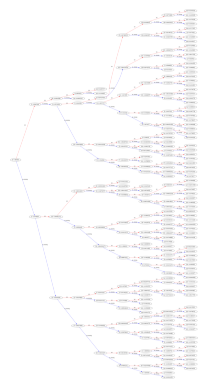

In [ ]:
import joblib
import os
import pandas as pd
from xgboost import plot_tree
import matplotlib.pyplot as plt

#load the trained pipeline
model_dir = '/home/jespinm/models/XGBoost05'
pipeline = joblib.load(os.path.join(model_dir, 'trained_xgboost_pipeline_model.pkl'))

#extract the classifier from the pipeline
estimator = pipeline.named_steps['clf']

#extract feature importances and match them with the training feature names
xgb_feature_importances = estimator.feature_importances_
xgb_selected_features = pd.Series(xgb_feature_importances, index=X_train.columns.tolist()).sort_values(ascending=False)

#print the selected features based on XGBoost importance
print("Selected features based on XGBoost importance:")
for idx, (feature_name, feature_importance) in enumerate(zip(xgb_selected_features.index, xgb_selected_features.values)):
    print(f"{get_feature_description(feature_name)} {feature_importance}")

#plot the decision tree from the XGBoost model
tree_index = 0
plt.figure(figsize=(20, 10))
plot_tree(estimator, num_trees=tree_index, rankdir='LR')
plt.savefig(os.path.join(model_dir, f"decision_tree_{tree_index}.png"), dpi=3000, bbox_inches='tight')
plt.show()

Visual analysis of the f2 score acroos over random search iterations

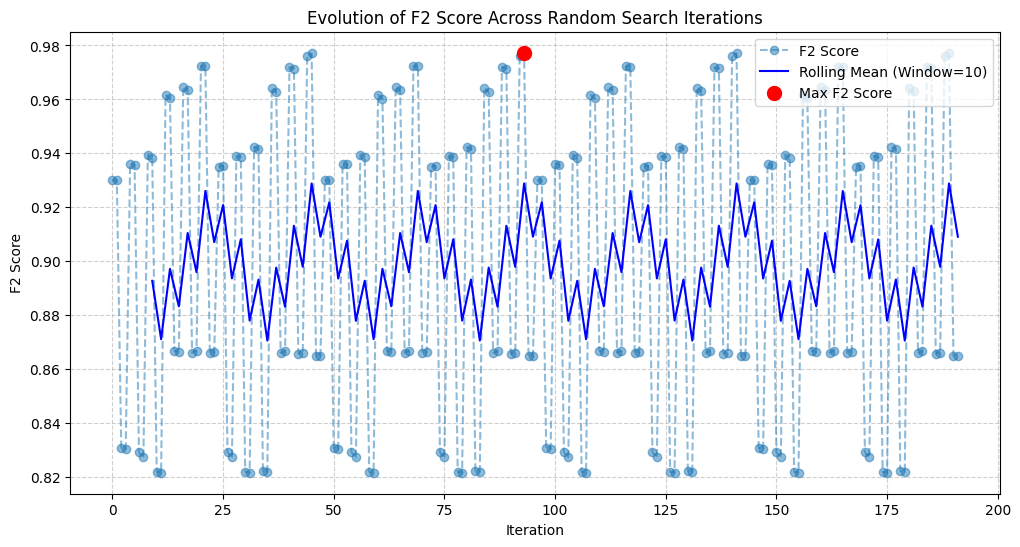

In [ ]:
cv_results = loaded_results['cv_results']  #adjusted key based on the structure of loaded_results
f2_scores = cv_results['mean_test_f2']  #extract F2 scores correctly

#create a rolling average to smooth the F2 score curve
rolling_window = 10
f2_scores_smoothed = pd.Series(f2_scores).rolling(window=rolling_window).mean()

#plot the F2 score evolution with smoothing
plt.figure(figsize=(12, 6))
plt.plot(f2_scores, marker='o', linestyle='--', alpha=0.5, label='F2 Score')
plt.plot(f2_scores_smoothed, color='blue', label=f'Rolling Mean (Window={rolling_window})')

#use np.argmax to find the index of the maximum F2 score
max_index = np.argmax(f2_scores)
plt.scatter(max_index, f2_scores[max_index], color='red', s=100, label='Max F2 Score', zorder=5)

#add labels, title, and grid for better readability
plt.title('Evolution of F2 Score Across Random Search Iterations')
plt.xlabel('Iteration')
plt.ylabel('F2 Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

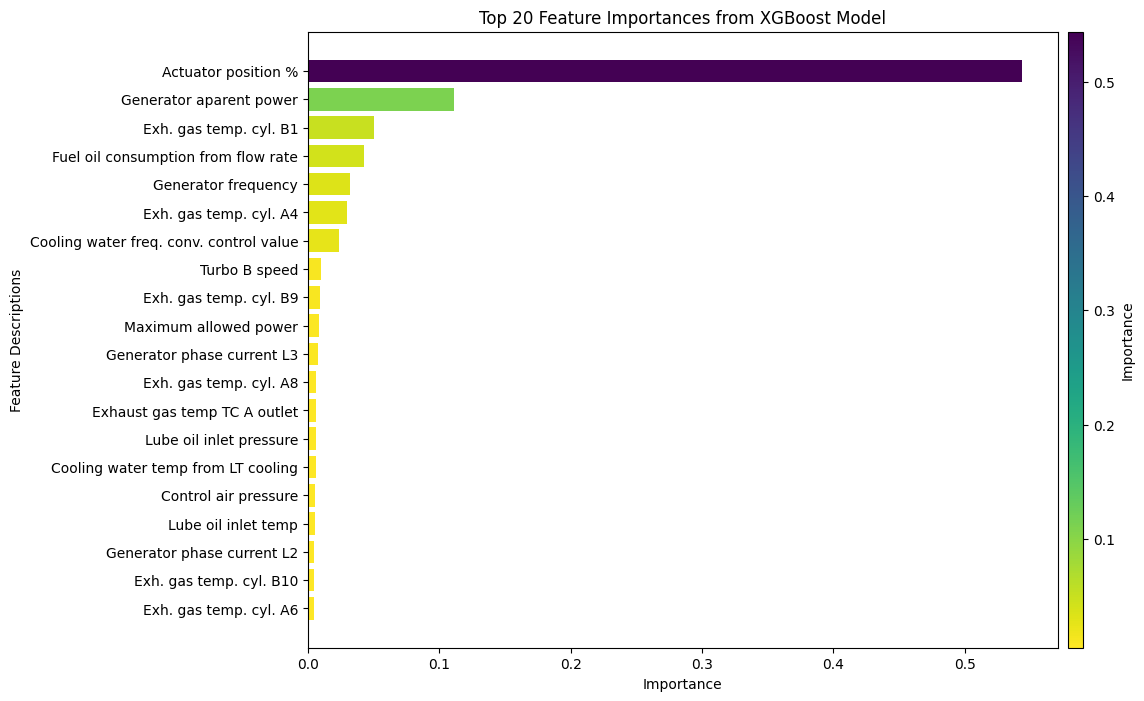

Feature importance plot saved at: /home/jespinm/models/XGBoost05/feature_importance_horizontal_viridis_top20_inverted.png


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


#extract feature importances from the XGBoost model
estimator = pipeline.named_steps['clf']
xgb_feature_importances = estimator.feature_importances_

#create a Series of feature importances with feature names as index
xgb_selected_features = pd.Series(xgb_feature_importances, index=X_train.columns.tolist()).sort_values(ascending=False)

#prepare feature descriptions
feature_descriptions = [get_feature_description(name) for name in xgb_selected_features.index]

#create a DataFrame and select the top 20 most important features
feature_importances_df = pd.DataFrame({
    'Feature': feature_descriptions,
    'Importance': xgb_selected_features
}).sort_values(by='Importance', ascending=False).head(20)

#create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

#normalize the importance values for color mapping
cmap = plt.get_cmap('viridis_r')
norm = plt.Normalize(feature_importances_df['Importance'].min(), feature_importances_df['Importance'].max())
colors = cmap(norm(feature_importances_df['Importance']))

#create the bar plot with features on y-axis and importances on x-axis
bars = ax.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color=colors)
ax.invert_yaxis()

#set labels and title
ax.set_xlabel('Importance')
ax.set_ylabel('Feature Descriptions')
ax.set_title('Top 20 Feature Importances from XGBoost Model')

#add colorbar to indicate importance levels
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='2%', pad=0.1)
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
cb.set_label('Importance')

#save the plot
plot_path = os.path.join(model_dir, 'feature_importance_horizontal_viridis_top20_inverted.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Feature importance plot saved at: {plot_path}")